In [2]:
#Import all necessary functions to perform numerical analysis and to import the files
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [3]:
#import the file
titanic_data = pd.read_csv("titanic_train.csv")

In [4]:
#print the data of the file 
print(titanic_data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [5]:
#add column to mmake status for death and alive, turned numerical into string
alive_dead = []
survived_data = titanic_data["Survived"].tolist()
for i in range(len(titanic_data)):
    point = survived_data[i]
    if point == 0:
        alive_dead.append("Dead")
    else:
        alive_dead.append("Alive")

titanic_data["Status"] = alive_dead

In [6]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Dead
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Alive
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alive
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Alive
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Dead
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Alive
888,889,0,3,"Johnston, Miss. Catherine Helen Carrie",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Dead
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Alive


In [7]:
#summary of all categories 
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Number of Passangers per Class')

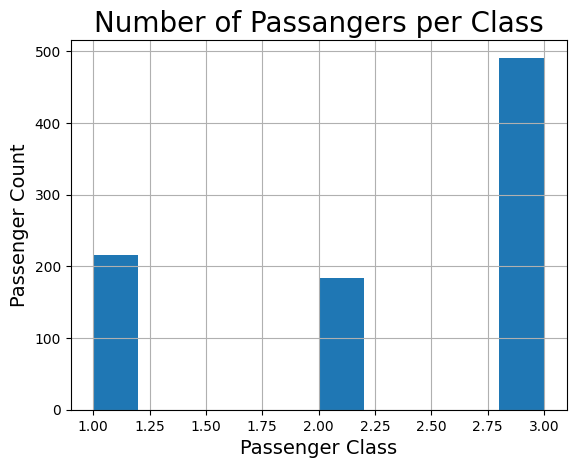

In [8]:
#histogram of the class
titanic_data.hist("Pclass")
plt.xlabel("Passenger Class", fontsize = 14)
plt.ylabel("Passenger Count", fontsize = 14)
plt.title("Number of Passangers per Class", fontsize = 20)

Text(0.5, 1.0, 'Passenger Count per Ticket Price')

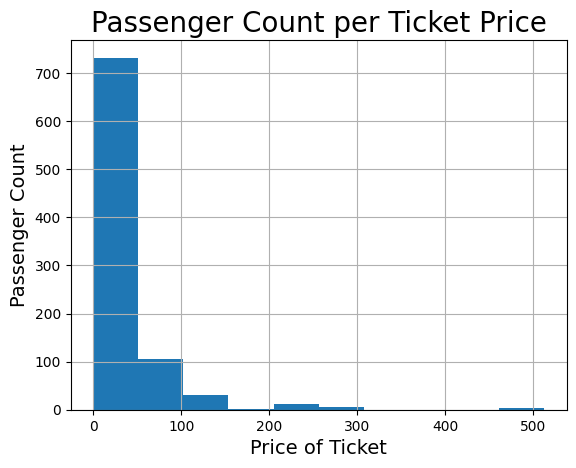

In [9]:
#Histogram of Passenger fare
titanic_data.hist("Fare")
plt.xlabel("Price of Ticket", fontsize = 14)
plt.ylabel("Passenger Count", fontsize = 14)
plt.title("Passenger Count per Ticket Price", fontsize = 20)

Text(0.5, 1.0, 'Titanic Survival Rate')

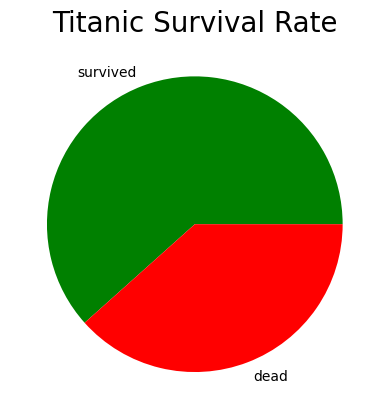

In [10]:
#Pie Chart to display survival rate
survival_rate = titanic_data["Survived"].value_counts()
pie_colors = ["green", "red"]
plt.pie(survival_rate, labels = ["survived", "dead"], colors = pie_colors)
plt.title("Titanic Survival Rate", fontsize = 20)

In [11]:
#print the number of dead and alive using a pivot table
survival_rate_pt = pd.pivot_table(titanic_data, values = "Survived", columns = "Status", aggfunc = "count" )
print(survival_rate_pt)

Status    Alive  Dead
Survived    342   549


Text(0.5, 1.0, 'Males per Passenger Class')

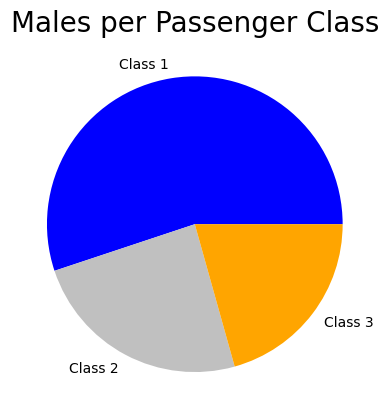

In [12]:
#Pie chart for males per class
passenger_class = titanic_data["Pclass"].value_counts()
pie_colors = ["blue", "Silver", "orange"]
plt.pie(passenger_class, labels = ["Class 1", "Class 2", "Class 3"], colors = pie_colors)
plt.title("Males per Passenger Class", fontsize = 20)

In [13]:
#Coorelation socre between Passenger Class and Ticket Fare
pclass = titanic_data["Pclass"]
fare = titanic_data["Fare"]

correlation = scipy.stats.pearsonr(pclass, fare)
print("Correlation Coefficient: ", correlation[0])

Correlation Coefficient:  -0.5494996199439077


In [14]:
#Returing the linear model stats of a regression line
linear_model = scipy.stats.linregress(pclass, fare)
print(linear_model)

LinregressResult(slope=np.float64(-32.66051837394822), intercept=np.float64(107.60565162201065), rvalue=np.float64(-0.5494996199439075), pvalue=np.float64(1.9673861734228546e-71), stderr=np.float64(1.66551333562709), intercept_stderr=np.float64(4.0891857488245975))


In [15]:
#Define slope and y-intercept to pull stats from regrssion line, and define the slope equation
slope = linear_model.slope
y_int = linear_model.intercept

linear_fit = slope*pclass+y_int

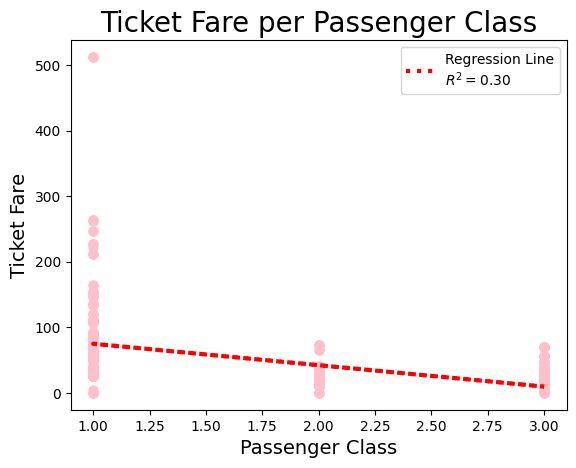

In [28]:
#Scatter Plot to show the Coorelation between passenger class and ticket fares
r_value = linear_model.rvalue
plt.scatter(pclass, fare, s = 40, color = "pink")
plt.plot(pclass, linear_fit, linewidth=3, color="red", linestyle=":", label = f'Regression Line\n$R^2 = {r_value**2:.2f}$')
plt.xlabel("Passenger Class", fontsize = 14)
plt.ylabel("Ticket Fare", fontsize = 14)
plt.title("Ticket Fare per Passenger Class", fontsize = 20)
plt.legend()

# The coorelation score being -.549 shows that goes in a negative direction is in between strong and weak. Meaning there is no significant coorelation between the two columns of data.

In [52]:
#Chai Squared Test on the sex and survival rate
sex_survived = pd.crosstab(titanic_data["Sex"], titanic_data["Status"], normalize = "columns")
print(sex_survived)

Status     Alive      Dead
Sex                       
female  0.681287  0.147541
male    0.318713  0.852459


In [53]:
c, p, dof, expected = scipy.stats.chi2_contingency(sex_survived)
print("The P-value is: ", p)

The P-value is:  1.0


In [54]:
print(sex_survived - expected)

Status     Alive      Dead
Sex                       
female  0.266873 -0.266873
male   -0.266873  0.266873


# The data set has no influence between the sex of the passenger the survival rate. In simpler terms, the survival rate is not dependent on the sex of a passenger 

In [29]:
fares_Q = titanic_data.query("Embarked=='Q'")['Fare']